# LAB 4-5 - COMPARING REGRESSION MODELS

For this lab, I'll restart from an empty notebook and just grab back the transformations I already selected in the previsou labs, keeping only the useful steps.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [2]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

In [3]:
customer_df = customer_df.rename(columns={'EmploymentStatus': 'Employment Status'})
customer_df.columns = [colname.lower().replace(' ','_') for colname in customer_df.columns]
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'], errors='coerce')
data_wrangling = customer_df.copy()

#### Months_since_last_claim

In [4]:
def clean_month_since_claim(x):
    if x < 12:
        return 0
    elif x < 24:
        return 1
    else:
        return 2

data_wrangling['years_since_last_claim'] = data_wrangling['months_since_last_claim'].apply(clean_month_since_claim)
data_wrangling = data_wrangling.drop(['months_since_last_claim'], axis = 1)

#### Months since policy inception

In [5]:
def clean_month_since_inception(x):
    if x < 24:
        return 2
    elif x < 48:
        return 4
    elif x < 72:
        return 6
    else:
        return 8

data_wrangling['years_since_policy_inception'] = data_wrangling['months_since_policy_inception'].apply(clean_month_since_inception)
data_wrangling = data_wrangling.drop(['months_since_policy_inception'], axis = 1)

#### Number of open complaints

In [6]:
data_wrangling['open_complaints'] = np.where(data_wrangling['number_of_open_complaints'] == 0, False, True)
data_wrangling = data_wrangling.drop(['number_of_open_complaints'], axis = 1)

#### Number of policies

In [7]:
def clean_policies(x):
    if x <= 3:
        return x
    elif x<= 6:
        return '4-6'
    else:
        return '> 6'

data_wrangling['number_of_policies'] = data_wrangling['number_of_policies'].apply(clean_policies)
data_wrangling['number_of_policies'] = data_wrangling['number_of_policies'].astype(str)

#### Income

In [8]:
income_labels = [0, 1, 2, 3]
data_wrangling['income_category'] = pd.cut(data_wrangling['income'],[-1,0,35000,65000,100000],labels=income_labels)
data_wrangling = data_wrangling.drop(['income'], axis=1)

#### Monthly Premium Auto

In [9]:
premium_labels = [1, 2, 3]
data_wrangling['premium_category'] = pd.cut(data_wrangling['monthly_premium_auto'],[0,70,100,300],labels=premium_labels)
data_wrangling = data_wrangling.drop(['monthly_premium_auto'], axis=1)

#### Response

In [10]:
data_wrangling['response'] = np.where(data_wrangling['response'] == 'No', 0, 1)

#### Mapping for Coverage, Education & Vehicle Size

In [11]:
data_wrangling['coverage'] = data_wrangling['coverage'].map({ 'Basic':1, 'Extended':2, 'Premium':3 })
data_wrangling['education'] = data_wrangling['education'].map({ 'High School or Below':1, 'College':2, 'Bachelor':3, 'Master':4, 'Doctor':5 })
data_wrangling['vehicle_size'] = data_wrangling['vehicle_size'].map({ 'Small':1, 'Medsize':2, 'Large':3 })

#### Policy Type & Policy

In [12]:
data_wrangling = data_wrangling.drop(['policy_type'], axis=1)
data_wrangling['policy'] = data_wrangling['policy'].apply(lambda x: 'Special' if 'Special' in x else x)

#### Vehicle CLass

In [13]:
def veh_class_cleaning(x):
    if 'Luxury' in x:
        return 'Lux'
    elif 'SUV'in x:
        return 'SUV'
    else:
        return 'Car'

data_wrangling['vehicle_class'] = data_wrangling['vehicle_class'].apply(veh_class_cleaning)

In [14]:
data_wrangling

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,location_code,...,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,years_since_last_claim,years_since_policy_inception,open_complaints,income_category,premium_category
0,BU79786,Washington,2763.519279,0,1,3,2011-02-24,Employed,F,Suburban,...,Offer1,Agent,384.811147,Car,2,2,2,False,2,1
1,QZ44356,Arizona,6979.535903,0,2,3,2011-01-31,Unemployed,F,Suburban,...,Offer3,Agent,1131.464935,Car,2,1,4,False,0,2
2,AI49188,Nevada,12887.431650,0,3,3,2011-02-19,Employed,F,Suburban,...,Offer1,Agent,566.472247,Car,2,1,4,False,2,3
3,WW63253,California,7645.861827,0,1,3,2011-01-20,Unemployed,M,Suburban,...,Offer1,Call Center,529.881344,SUV,2,1,6,False,0,3
4,HB64268,Washington,2813.692575,0,1,3,2011-02-03,Employed,M,Rural,...,Offer1,Agent,138.130879,Car,2,1,4,False,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,0,1,3,2011-02-10,Employed,M,Urban,...,Offer2,Web,198.234764,Car,2,1,8,False,3,2
9130,PK87824,California,3096.511217,1,2,2,2011-02-12,Employed,F,Suburban,...,Offer1,Branch,379.200000,Car,2,1,4,False,1,2
9131,TD14365,California,8163.890428,0,2,3,2011-02-06,Unemployed,M,Suburban,...,Offer1,Branch,790.784983,Car,2,0,4,True,0,2
9132,UP19263,California,7524.442436,0,2,2,2011-02-03,Employed,M,Suburban,...,Offer3,Branch,691.200000,Car,3,2,2,False,1,2


#### Effective to Date

Based on the hint, added the month, week and day columns, instead of just droping the date column.

In [15]:
data_wrangling['effective_to_date'] = pd.to_datetime(data_wrangling['effective_to_date'], errors='coerce')
data_wrangling['month'] = pd.DatetimeIndex(data_wrangling['effective_to_date']).month
data_wrangling['week'] = pd.DatetimeIndex(data_wrangling['effective_to_date']).week
data_wrangling['day'] = pd.DatetimeIndex(data_wrangling['effective_to_date']).day

data_wrangling = data_wrangling.drop(['effective_to_date'], axis=1)

C:\Users\ebour\AppData\Local\Temp/ipykernel_7588/738472651.py:3: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  data_wrangling['week'] = pd.DatetimeIndex(data_wrangling['effective_to_date']).week


#### Customer

In [16]:
data_wrangling = data_wrangling.drop(['customer'], axis=1)

This is where I stood at the end of the previous lab.

## 1. In this final lab, we will model our data. Import sklearn train_test_split and separate the data.

In [17]:
from sklearn.model_selection import train_test_split

I will do the train/test split later in the lab

## 2. We will start with removing outliers

In the previous labs, I have binned most of the numerical variables, and left unchanged two of them :
- total claim amount : will be the target
- customer lifetime value : I thought this was somehow representing the age of the customer, but after googling CLV today, I realize I was totally wrong. I thus still have to handle this column.

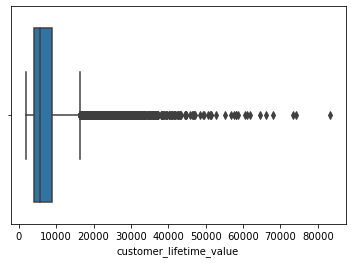

In [18]:
sns.boxplot(x=data_wrangling['customer_lifetime_value'])
plt.show()

We see that this variable clearly contains outliers.
To avoid droping rows and losing data, I will try to appky a log transformation to the column

In [19]:
data_wrangling['customer_lifetime_value'].describe()

count     9134.000000
mean      8004.940475
std       6870.967608
min       1898.007675
25%       3994.251794
50%       5780.182197
75%       8962.167041
max      83325.381190
Name: customer_lifetime_value, dtype: float64

There is no NaN in the column (checked earlier) and only positive values.

In [20]:
data_wrangling['customer_lifetime_value'] = data_wrangling['customer_lifetime_value'].apply(lambda x: np.log(x))

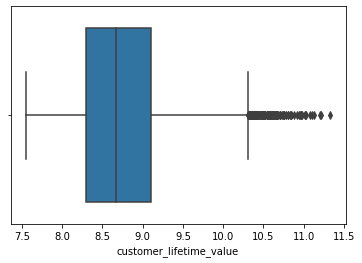

In [21]:
sns.boxplot(x=data_wrangling['customer_lifetime_value'])
plt.show()

This has strongly reduced the amplitude of the box plot.

## 3. Create a copy of the dataframe for the data wrangling.

This was already done.

## 4. Normalize the continuous variables. You can use any one method you want.

From the hint in the read.me file, I understand that we should use an ordinal encoder as well for marital status and location code. I guess it is important to do so before we scale the numerical variables.

In [22]:
data_wrangling['marital_status'].unique()

array(['Married', 'Single', 'Divorced'], dtype=object)

In [23]:
data_wrangling['marital_status'] = data_wrangling['marital_status'].map({ 'Single':1, 'Married':2, 'Divorced':3 })

In [24]:
data_wrangling['location_code'].unique()

array(['Suburban', 'Rural', 'Urban'], dtype=object)

In [25]:
data_wrangling['location_code'] = data_wrangling['location_code'].map({ 'Rural':1, 'Suburban':2, 'Urban':3 })

In [26]:
data_wrangling['employment_status'].unique()

array(['Employed', 'Unemployed', 'Medical Leave', 'Disabled', 'Retired'],
      dtype=object)

In [27]:
customer_df.groupby('employment_status').agg({'income':np.mean})

,income
employment_status,
Disabled,20045.582716
Employed,56384.884521
Medical Leave,20292.770833
Retired,20554.960993
Unemployed,0.000000


In [28]:
data_wrangling['employment_status'] = data_wrangling['employment_status'].map({ 'Unemployed':1, 'Disabled':2, 'Medical Leave':3, 'Retired':4, 'Employed':5 })

In [29]:
X = data_wrangling.drop(['total_claim_amount'], axis=1)
y = data_wrangling['total_claim_amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [30]:
numericals_train = X_train.select_dtypes(np.number)
numericals_test = X_test.select_dtypes(np.number)
numericals_train.head()

,customer_lifetime_value,response,coverage,education,employment_status,location_code,marital_status,vehicle_size,years_since_last_claim,years_since_policy_inception,month,week,day
7706,8.091063,1,2,3,5,2,3,2,0,6,1,4,26
779,9.334161,0,2,1,5,2,2,2,2,6,1,2,13
8189,8.744241,0,2,1,3,2,1,1,2,4,2,7,14
1942,8.365716,0,3,1,5,2,1,3,0,8,1,2,12
459,9.221357,0,2,3,3,3,2,3,2,4,2,7,16


In [31]:
categoricals_train= X_train.select_dtypes(np.object)
categoricals_test= X_test.select_dtypes(np.object)
categoricals_train.head()

C:\Users\ebour\AppData\Local\Temp/ipykernel_7588/1113157546.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoricals_train= X_train.select_dtypes(np.object)
C:\Users\ebour\AppData\Local\Temp/ipykernel_7588/1113157546.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoricals_test= X_test.select_dtypes(np.object)


,state,gender,number_of_policies,policy,renew_offer_type,sales_channel,vehicle_class
7706,California,F,1,Personal L2,Offer1,Agent,Car
779,California,F,2,Personal L1,Offer2,Branch,Car
8189,Oregon,F,3,Personal L1,Offer1,Agent,Car
1942,Nevada,F,1,Personal L3,Offer4,Branch,Car
459,California,F,2,Corporate L3,Offer1,Branch,Car


In [32]:
from sklearn.preprocessing import StandardScaler

transformer = StandardScaler().fit(numericals_train)
numericals_train_standardized = transformer.transform(numericals_train)
numericals_test_standardized = transformer.transform(numericals_test)

## 5. Encode the categorical variables

In [33]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(categoricals_train)
categoricals_train_encoded = encoder.transform(categoricals_train).toarray()
categoricals_test_encoded = encoder.transform(categoricals_test).toarray()

In [34]:
encoder.categories_

[array(['Arizona', 'California', 'Nevada', 'Oregon', 'Washington'],
       dtype=object),
 array(['F', 'M'], dtype=object),
 array(['1', '2', '3', '4-6', '> 6'], dtype=object),
 array(['Corporate L1', 'Corporate L2', 'Corporate L3', 'Personal L1',
        'Personal L2', 'Personal L3', 'Special'], dtype=object),
 array(['Offer1', 'Offer2', 'Offer3', 'Offer4'], dtype=object),
 array(['Agent', 'Branch', 'Call Center', 'Web'], dtype=object),
 array(['Car', 'Lux', 'SUV'], dtype=object)]

In [35]:
categoricals_train_encoded

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

## 6. The time variable can be useful. Try to transform its data into a useful one.
#### Hint: Day week and month as integers might be useful.

Already done in introduction.

## 7. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

In [36]:
X_train = np.concatenate((numericals_train_standardized,categoricals_train_encoded),axis=1)
X_test = np.concatenate((numericals_test_standardized,categoricals_test_encoded),axis=1)

## 8. Try a simple linear regression with all the data to see whether we are getting good results.

In [40]:
from sklearn import linear_model

lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)
score = lm.score(X_test, y_test)
score

0.5521108823846397

The result is not very good, but we'll see later if it does better than the other ones we can try.

## 9. Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.

In [57]:
def model_train_test (model):
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    return score

In [58]:
lm2 = linear_model.LinearRegression()
model_train_test(lm2)

0.5521108823846397

it seems to work !

## 10. Use the function to check LinearRegressor and KNeighborsRegressor

Linear regressor was just done as a check in question 9.
Let's do KNeighborsRegressor.

In [59]:
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier

KNN_3 = KNeighborsRegressor(n_neighbors=3)
model_train_test(KNN_3)

0.5626250577217318

The score is slightly better than the linear regression, but not significantly. Let's try with other values for k.

In [63]:
for k in range(1,15):
    KNN = KNeighborsRegressor(n_neighbors= k )
    print('Score for k = ', k, ' is ', round(model_train_test(KNN), 5))

Score for k =  1  is  0.32422
Score for k =  2  is  0.50606
Score for k =  3  is  0.56263
Score for k =  4  is  0.5756
Score for k =  5  is  0.5802
Score for k =  6  is  0.5742
Score for k =  7  is  0.56798
Score for k =  8  is  0.56405
Score for k =  9  is  0.56356
Score for k =  10  is  0.55693
Score for k =  11  is  0.55743
Score for k =  12  is  0.55613
Score for k =  13  is  0.55911
Score for k =  14  is  0.56061


Text(0, 0.5, 'Accuracy')

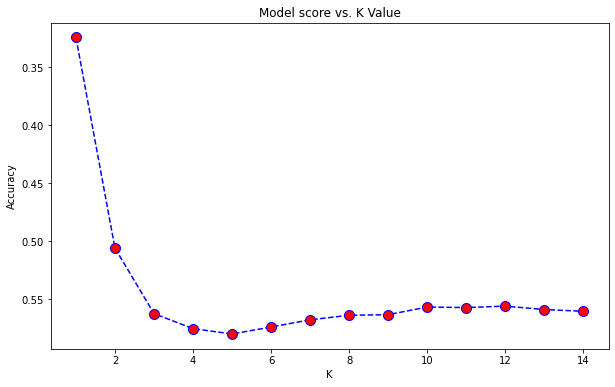

In [64]:
scores = []
for k in range(1,15):
    KNN = KNeighborsRegressor(n_neighbors=k)
    score = model_train_test(KNN)
    scores.append(score)

plt.figure(figsize=(10,6))
plt.plot(range(1,15),scores,color = 'blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('Model score vs. K Value')
plt.gca().invert_yaxis()
plt.xlabel('K')
plt.ylabel('Accuracy')

The best value for k seems to be 5, which is small enough not to flatten the regression and not have too much bias either.
The score of the model is then 0.5802.

## 11. You can check also the MLPRegressor for this task!

In [65]:
from sklearn.neural_network import MLPRegressor

In [66]:
MLP_reg = MLPRegressor(random_state=100, max_iter=500)

In [67]:
model_train_test(MLP_reg)

C:\Users\ebour\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


0.800160675323349

In [68]:
MLP_reg_750 = MLPRegressor(random_state=100, max_iter=750)
model_train_test(MLP_reg_750)

C:\Users\ebour\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (750) reached and the optimization hasn't converged yet.
  warnings.warn(


0.8098339265439786

In [69]:
MLP_reg_750 = MLPRegressor(random_state=100, max_iter=1000)
model_train_test(MLP_reg_750)

C:\Users\ebour\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


0.8139825281610994

We see that his model brings up a significantly better result than the linear of KNeighbors regressors.

When we increase the max number of iterations, the results seem to even improve slightly. I'll stop here, to avoid crashing my computer !